In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sigcorr.config import CFG

from sigcorr.tools.utils import get_last_from_iter
from sigcorr.tools.visual import set_plt_reasonable_defaults

from sigcorr.tools.euler_number import euler_number_along_zero_ax

from sigcorr.tools.stats.ts.upcross import propagate_upcross

from sigcorr.mapreduce.gp import gp_batch_mapreduce
from sigcorr.mapreduce.file import h5_batch_mapreduce

from sigcorr.mapreduce.map_reducers import SigsCalc
from sigcorr.mapreduce.map_reducers import BatchStats2Reduce

from sigcorr.models.hyy_2d import Hyy2D
from sigcorr.models.hyy_2d_asimov import Hyy2DAsimov
from sigcorr.models.utils import set_params_from_file


CFG.FITTER.bfit_pool_size = 60  # gp draws use this pool size

set_plt_reasonable_defaults(plt)

In [2]:
#input_file = "../../output/alex_exp-1m.h5"
#input_file = "../../output/gross_vitells-1m.h5"
input_file1 = "../../output/hyy2d_dense-100k.h5"
asimov_input_file1 = input_file1.split("-")[0]+"-asimov.h5"

input_file2 = "../../output/hyy2d-2560.h5"
asimov_input_file2 = input_file2.split("-")[0]+"-asimov.h5"

In [3]:
#true_model = GrossVitells(None)
#true_model = Hyy(None)
true_model1 = Hyy2D(None)
set_params_from_file(true_model1, input_file1)
true_model1.init()

true_model2 = Hyy2D(None)
set_params_from_file(true_model2, input_file2)
true_model2.init()

In [4]:
true_covcalc1, _ = get_last_from_iter(h5_batch_mapreduce(input_file1, ["b_loglikes", "sb_loglikes", "sb_params"], 10_000, SigsCalc(), BatchStats2Reduce()))
true_cov1, true_cov_err1 = true_covcalc1.get_cov(), true_covcalc1.get_cov_stat_err()
true_corr1, true_corr_err1 = true_covcalc1.get_corr(), true_covcalc1.get_corr_stat_err()

true_covcalc2, _ = get_last_from_iter(h5_batch_mapreduce(input_file2, ["b_loglikes", "sb_loglikes", "sb_params"], 10_000, SigsCalc(), BatchStats2Reduce()))
true_cov2, true_cov_err2 = true_covcalc2.get_cov(), true_covcalc2.get_cov_stat_err()
true_corr2, true_corr_err2 = true_covcalc2.get_corr(), true_covcalc2.get_corr_stat_err()

100%|██████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [00:00<00:00, 10346.01it/s]


In [5]:
asimov_covcalc1, _ = get_last_from_iter(h5_batch_mapreduce(asimov_input_file1, ["b_loglikes", "sb_loglikes", "sb_params"], 10_000, SigsCalc(), BatchStats2Reduce()))
asimov_cov1, asimov_cov_err1 = asimov_covcalc1.get_cov(override_x=np.array(0)), asimov_covcalc1.get_cov_stat_err(override_x=np.array(0))
asimov_corr1, asimov_corr_err1 = asimov_covcalc1.get_corr(override_x=np.array(0)), asimov_covcalc1.get_corr_stat_err(override_x=np.array(0))

asimov_covcalc2, _ = get_last_from_iter(h5_batch_mapreduce(asimov_input_file2, ["b_loglikes", "sb_loglikes", "sb_params"], 10_000, SigsCalc(), BatchStats2Reduce()))
asimov_cov2, asimov_cov_err2 = asimov_covcalc2.get_cov(override_x=np.array(0)), asimov_covcalc2.get_cov_stat_err(override_x=np.array(0))
asimov_corr2, asimov_corr_err2 = asimov_covcalc2.get_corr(override_x=np.array(0)), asimov_covcalc2.get_corr_stat_err(override_x=np.array(0))

100%|██████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [00:00<00:00, 17808.89it/s]


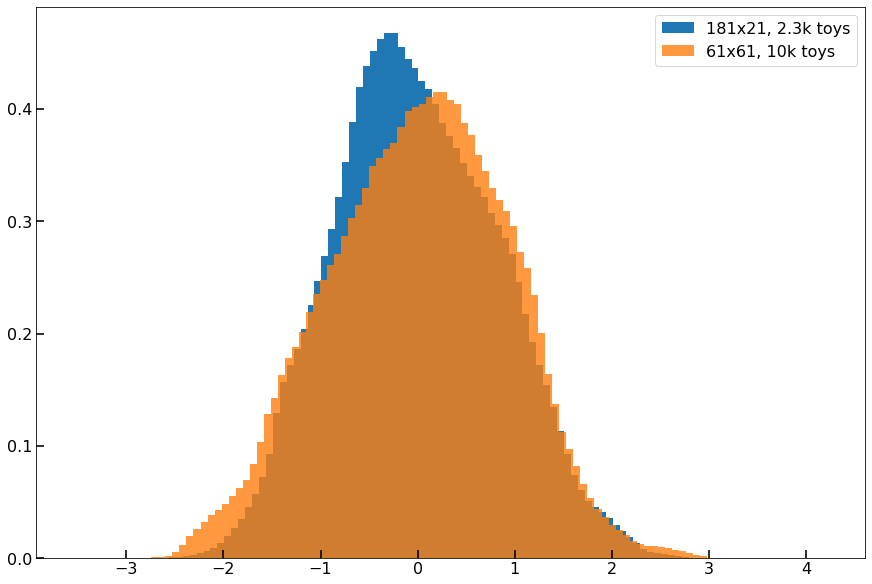

In [6]:
plt.hist(((true_cov2 - asimov_corr2)/true_cov_err2).ravel(), bins=100, density=True, label="181x21, 2.3k toys");
plt.hist(((true_cov1 - asimov_corr1)/true_cov_err1).ravel(), bins=100, density=True, label="61x61, 10k toys", alpha=0.8);
plt.legend()